# M09T01: Anàlisi de sentiment textos
***na gran part de les dades que podem trobar per analitzar utilitzant l'aprenentatge automàtic és text lliure. En aquest sprint veurem com analitzar-lo, netejar-lo i realitzar anàlisi de sentiments.***
 

## Nivell1 - 


### Exercici 1
***Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.***


In [124]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
pd.options.display.max_columns=None
pd.options.display.max_rows=30

***Incorporament directament un texte en Anglès sobre una amplia crítica de la apelícula Three Thousand Years of Longing de George Miller***

In [150]:
englishFilmreview="“Three Thousand Years of Longing,” the new film directed by the protean “Mad Max: Fury Road” creator George Miller, is very much a battleground. And very much about the emotion tagged in the title. In the case of Alithea, the academic played with traits both prim and feisty by Tilda Swinton, the longing is one she denies. Introducing herself in voiceover as a “narratologist,” that is, a studier of stories, she cherishes her solitary self-sufficiency. Arriving in a storybook-bright Istanbul for a conference, she’s put up in the Agatha Christie room of the Pera Palace Hotel. “She wrote Death on the Nile here,” Alithea is told. The movie will be about emotion, but also about storytelling and stories.During a lecture Alithea faints after a hallucination. We are to ask, later, whether it was a hallucination or something ancient and real calling to her. Back in her hotel room, she tries to scrub off an ornamental bottle she picked up at an antique shop. And yes, she unleashes a genie, or djinn, and a giant one at that—the sight of his enormous foot opening her bathroom door is something unusual to be sure—who, upon learning some English, proffers Alithea the standard three wishes. As played by Idris Elba, the djinn is a figure grave, funny, absurd, and moving.As for those wishes: not so fast. As a narratologist, Alithea knows that a djinn is one gift horse worth looking in the mouth. The wish-fulfillment narratives involving genies famously never work out—either due to the stupidity/venality of the wisher or, more pertinent to Alithea, the fact that genies are notorious tricksters. There’s a reason they end up trapped in bottles, after all. And so, rather than a wish-fulfillment journey, Alithea begins an interrogation.The djinn’s first tale sets the tone and pace for the rest of the movie. He was a consort, or so he claims, and teacher to the famed Queen of Sheba (“She was not beautiful. She was beauty itself,” the Djinn avers, and in the form of actress Aamito Lagum, she indeed is), until that wily Solomon came along. Even the elaborate tableaux of Cecil B. DeMille aren’t sufficient preparation for the production design and CGI-driven phantasmagoria of this tale, which features, among other things, a kind of self-playing lyre, the better to augment the song of Solomon that seduces Sheba."

In [151]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
englishFilmreviewWord=word_tokenize(englishFilmreview)
print(englishFilmreviewWord)

['“', 'Three', 'Thousand', 'Years', 'of', 'Longing', ',', '”', 'the', 'new', 'film', 'directed', 'by', 'the', 'protean', '“', 'Mad', 'Max', ':', 'Fury', 'Road', '”', 'creator', 'George', 'Miller', ',', 'is', 'very', 'much', 'a', 'battleground', '.', 'And', 'very', 'much', 'about', 'the', 'emotion', 'tagged', 'in', 'the', 'title', '.', 'In', 'the', 'case', 'of', 'Alithea', ',', 'the', 'academic', 'played', 'with', 'traits', 'both', 'prim', 'and', 'feisty', 'by', 'Tilda', 'Swinton', ',', 'the', 'longing', 'is', 'one', 'she', 'denies', '.', 'Introducing', 'herself', 'in', 'voiceover', 'as', 'a', '“', 'narratologist', ',', '”', 'that', 'is', ',', 'a', 'studier', 'of', 'stories', ',', 'she', 'cherishes', 'her', 'solitary', 'self-sufficiency', '.', 'Arriving', 'in', 'a', 'storybook-bright', 'Istanbul', 'for', 'a', 'conference', ',', 'she', '’', 's', 'put', 'up', 'in', 'the', 'Agatha', 'Christie', 'room', 'of', 'the', 'Pera', 'Palace', 'Hotel', '.', '“', 'She', 'wrote', 'Death', 'on', 'the', 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***Importem el modul FreqDist per visualitzar la frequència de les paraules***

In [152]:
from nltk.probability import FreqDist
englishFilmreviewFreq = FreqDist(englishFilmreviewWord)
print(englishFilmreviewFreq)

<FreqDist with 249 samples and 468 outcomes>


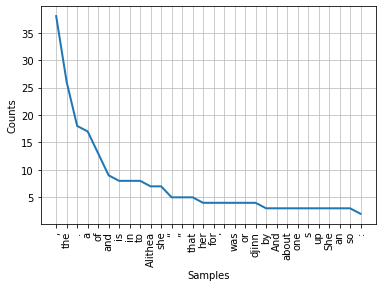

In [153]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
englishFilmreviewFreq.plot(30,cumulative=False)
plt.show()

### Exercici 2
***Treu les stopwords i realitza stemming al teu conjunt de dades.***

***Importem la llibreria stopwords i afegim alguns simbols adicionals que ajudaran a netejar***

In [154]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords=set(stopwords.words("english"))
stopWordsAdd=[",",":",'"','“','”', '’',]
stopWords.update(stopWordsAdd)
print(stopWords)


{'that', 'after', 'weren', 'ourselves', 'then', 'most', "isn't", 'had', "you'd", 'are', "doesn't", 'is', 'won', 'if', 'how', 'some', 'were', 'wasn', "couldn't", 'll', 'don', "haven't", 'now', 'between', 'we', 'as', 'having', 'do', 'very', "shan't", 'off', 'you', 'himself', 'each', 'than', 'yourselves', 'more', 'me', 'hers', '“', "aren't", 'to', 'ma', 'nor', 'for', 'these', 'because', "it's", 'it', 'he', 'hasn', 'your', 'too', 't', 'of', 'all', 'am', 'once', 'but', 'why', "you're", "needn't", '’', 'under', 'same', "don't", 'theirs', 'when', 'isn', ',', 'yourself', 'against', "didn't", 'mustn', 'until', 'such', 'them', "she's", "hasn't", 'with', 'whom', 'only', "you've", 'a', "mightn't", 'myself', 'be', "wasn't", 'from', 'they', 'has', 'needn', "that'll", 'any', 'few', "weren't", 'will', 'own', ':', 'shouldn', 'haven', 'can', 're', 'doesn', "mustn't", 'its', 'been', 'while', 'into', 'again', 'shan', 'did', 'there', 'm', 'at', 'during', 'i', 'on', 'being', 'what', 'y', 'was', 'should', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
englishFilmreviewStop=[]
for word in englishFilmreviewFreq:
    if word not in stopWords:
        englishFilmreviewStop.append(word)

print("Filterd Sentence:",englishFilmreviewStop)

Filterd Sentence: ['.', 'Alithea', 'djinn', 'And', 'one', 'She', 'much', 'emotion', 'played', 'narratologist', 'room', 'The', 'movie', 'hallucination', 'something', 'wishes', 'As', 'wish-fulfillment', 'genies', 'tale', 'Sheba', 'Solomon', 'Three', 'Thousand', 'Years', 'Longing', 'new', 'film', 'directed', 'protean', 'Mad', 'Max', 'Fury', 'Road', 'creator', 'George', 'Miller', 'battleground', 'tagged', 'title', 'In', 'case', 'academic', 'traits', 'prim', 'feisty', 'Tilda', 'Swinton', 'longing', 'denies', 'Introducing', 'voiceover', 'studier', 'stories', 'cherishes', 'solitary', 'self-sufficiency', 'Arriving', 'storybook-bright', 'Istanbul', 'conference', 'put', 'Agatha', 'Christie', 'Pera', 'Palace', 'Hotel', 'wrote', 'Death', 'Nile', 'told', 'also', 'storytelling', 'stories.During', 'lecture', 'faints', 'We', 'ask', 'later', 'whether', 'ancient', 'real', 'calling', 'Back', 'hotel', 'tries', 'scrub', 'ornamental', 'bottle', 'picked', 'antique', 'shop', 'yes', 'unleashes', 'genie', 'gian

***Una vegada netejat el texte de stopwords fem el stemming***

In [156]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmedEnglishFilmreview=[]
for word in englishFilmreviewStop:
    stemmedEnglishFilmreview.append(ps.stem(word))

print("Stemmed Sentence:",stemmedEnglishFilmreview)


Stemmed Sentence: ['.', 'alithea', 'djinn', 'and', 'one', 'she', 'much', 'emot', 'play', 'narratologist', 'room', 'the', 'movi', 'hallucin', 'someth', 'wish', 'as', 'wish-fulfil', 'geni', 'tale', 'sheba', 'solomon', 'three', 'thousand', 'year', 'long', 'new', 'film', 'direct', 'protean', 'mad', 'max', 'furi', 'road', 'creator', 'georg', 'miller', 'battleground', 'tag', 'titl', 'in', 'case', 'academ', 'trait', 'prim', 'feisti', 'tilda', 'swinton', 'long', 'deni', 'introduc', 'voiceov', 'studier', 'stori', 'cherish', 'solitari', 'self-suffici', 'arriv', 'storybook-bright', 'istanbul', 'confer', 'put', 'agatha', 'christi', 'pera', 'palac', 'hotel', 'wrote', 'death', 'nile', 'told', 'also', 'storytel', 'stories.dur', 'lectur', 'faint', 'we', 'ask', 'later', 'whether', 'ancient', 'real', 'call', 'back', 'hotel', 'tri', 'scrub', 'ornament', 'bottl', 'pick', 'antiqu', 'shop', 'ye', 'unleash', 'geni', 'giant', 'that—th', 'sight', 'enorm', 'foot', 'open', 'bathroom', 'door', 'unusu', 'sure—who'

### Exercici 3
***Realitza sentiment analysis al teu conjunt de dades.***

***Separaem les frases del texte***

In [157]:
from nltk.tokenize import sent_tokenize

englishFilmreviewTok=sent_tokenize(englishFilmreview)
print(englishFilmreviewTok)

['“Three Thousand Years of Longing,” the new film directed by the protean “Mad Max:\xa0Fury Road” creator\xa0George Miller, is very much a battleground.', 'And very much about the emotion tagged in the title.', 'In the case of Alithea, the academic played with traits both prim and feisty by\xa0Tilda Swinton, the longing is one she denies.', 'Introducing herself in voiceover as a “narratologist,” that is, a studier of stories, she cherishes her solitary self-sufficiency.', 'Arriving in a storybook-bright Istanbul for a conference, she’s put up in the\xa0Agatha Christie\xa0room of the Pera Palace Hotel.', '“She wrote\xa0Death on the Nile\xa0here,” Alithea is told.', 'The movie will be about emotion, but also about storytelling and stories.During a lecture Alithea faints after a hallucination.', 'We are to ask, later, whether it was a hallucination or something ancient and real calling to her.', 'Back in her hotel room, she tries to scrub off an ornamental bottle she picked up at an antiq

***Visualitzem les frases del texte***

In [158]:
for phrase in englishFilmreviewTok:
    print (phrase)

“Three Thousand Years of Longing,” the new film directed by the protean “Mad Max: Fury Road” creator George Miller, is very much a battleground.
And very much about the emotion tagged in the title.
In the case of Alithea, the academic played with traits both prim and feisty by Tilda Swinton, the longing is one she denies.
Introducing herself in voiceover as a “narratologist,” that is, a studier of stories, she cherishes her solitary self-sufficiency.
Arriving in a storybook-bright Istanbul for a conference, she’s put up in the Agatha Christie room of the Pera Palace Hotel.
“She wrote Death on the Nile here,” Alithea is told.
The movie will be about emotion, but also about storytelling and stories.During a lecture Alithea faints after a hallucination.
We are to ask, later, whether it was a hallucination or something ancient and real calling to her.
Back in her hotel room, she tries to scrub off an ornamental bottle she picked up at an antique shop.
And yes, she unleashes a genie, or dji

***Convertim el resultat en una dataframe per facilitar la manipulacio de les dades i tambbè afegiren columnes relacionades amb l'analisi de sentiments***

In [159]:
englishFilmreviewTokdf = pd.DataFrame (englishFilmreviewTok, columns = ['frase'])

In [160]:
englishFilmreviewTokdf

,frase
0,"“Three Thousand Years of Longing,” the new fil..."
1,And very much about the emotion tagged in the ...
2,"In the case of Alithea, the academic played wi..."
3,Introducing herself in voiceover as a “narrato...
4,Arriving in a storybook-bright Istanbul for a ...
5,"“She wrote Death on the Nile here,” Alithea is..."
6,"The movie will be about emotion, but also abou..."
7,"We are to ask, later, whether it was a halluci..."
8,"Back in her hotel room, she tries to scrub off..."
9,"And yes, she unleashes a genie, or djinn, and ..."


***Netegem casa frase de lletres estranyes***

In [161]:
import re

In [162]:
for fras in englishFilmreviewTokdf.frase:
    englishFilmreviewTokdf['fraseClean'] = englishFilmreviewTokdf['frase'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ',str(x)))

In [163]:
englishFilmreviewTokdf

,frase,fraseClean
0,"“Three Thousand Years of Longing,” the new fil...",Three Thousand Years of Longing the new film ...
1,And very much about the emotion tagged in the ...,And very much about the emotion tagged in the ...
2,"In the case of Alithea, the academic played wi...",In the case of Alithea the academic played wit...
3,Introducing herself in voiceover as a “narrato...,Introducing herself in voiceover as a narratol...
4,Arriving in a storybook-bright Istanbul for a ...,Arriving in a storybook bright Istanbul for a ...
5,"“She wrote Death on the Nile here,” Alithea is...",She wrote Death on the Nile here Alithea is t...
6,"The movie will be about emotion, but also abou...",The movie will be about emotion but also about...
7,"We are to ask, later, whether it was a halluci...",We are to ask later whether it was a hallucina...
8,"Back in her hotel room, she tries to scrub off...",Back in her hotel room she tries to scrub off ...
9,"And yes, she unleashes a genie, or djinn, and ...",And yes she unleashes a genie or djinn and a g...


***Importem les llibreries necessaaries per fer uan analisis de sentiment***

In [164]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import sentiment
analitzador = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


***Recorrem cada frase netejada i apliquen polarity_score oper tenir els resultats dels sentiments de cada frase***

In [165]:
neg=[]
pos=[]
neu=[]
comp=[]
for fras in englishFilmreviewTokdf.fraseClean:
    fraseSent = analitzador.polarity_scores(fras)
    for clau in fraseSent:
        if clau == 'neg': 
            neg.append(fraseSent[clau])
        elif clau == 'neu': 
            neu.append(fraseSent[clau])
        elif clau == 'pos': 
            pos.append(fraseSent[clau])
        else: 
            comp.append(fraseSent[clau])

In [166]:
englishFilmreviewTokdf['positiu']=pos
englishFilmreviewTokdf['negatiu']=neg
englishFilmreviewTokdf['neutre']=neu
englishFilmreviewTokdf['compost']=comp

In [167]:
englishFilmreviewTokdf

,frase,fraseClean,positiu,negatiu,neutre,compost
0,"“Three Thousand Years of Longing,” the new fil...",Three Thousand Years of Longing the new film ...,0.000,0.366,0.634,-0.8744
1,And very much about the emotion tagged in the ...,And very much about the emotion tagged in the ...,0.000,0.000,1.000,0.0000
2,"In the case of Alithea, the academic played wi...",In the case of Alithea the academic played wit...,0.091,0.148,0.760,-0.1280
3,Introducing herself in voiceover as a “narrato...,Introducing herself in voiceover as a narratol...,0.167,0.000,0.833,0.4939
4,Arriving in a storybook-bright Istanbul for a ...,Arriving in a storybook bright Istanbul for a ...,0.132,0.000,0.868,0.4404
5,"“She wrote Death on the Nile here,” Alithea is...",She wrote Death on the Nile here Alithea is t...,0.000,0.302,0.698,-0.5994
6,"The movie will be about emotion, but also abou...",The movie will be about emotion but also about...,0.000,0.000,1.000,0.0000
7,"We are to ask, later, whether it was a halluci...",We are to ask later whether it was a hallucina...,0.000,0.000,1.000,0.0000
8,"Back in her hotel room, she tries to scrub off...",Back in her hotel room she tries to scrub off ...,0.000,0.000,1.000,0.0000
9,"And yes, she unleashes a genie, or djinn, and ...",And yes she unleashes a genie or djinn and a g...,0.155,0.000,0.845,0.6808


***Analitzem el compound per definir el sentiment de cada frase i fem una gràfica del sentiment per frases***
* En base al compound que va desde -1 a 1 de negatiu a positiu definim si el resultat de cada frase es positiu negatiu o neuutre

***Fem 9 trams desde molt negatiu fins a molt positiu , dividien desde -1 a 1 en trams de 0.25 ja que ens doanarà una visió mes complerta***

In [168]:
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0) & (englishFilmreviewTokdf.compost <=0.25) ,'SentimentTotal']='LLeugerament Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.25) & (englishFilmreviewTokdf.compost <=0.50) ,'SentimentTotal']='Moderadament  Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.50) & (englishFilmreviewTokdf.compost <=0.75) ,'SentimentTotal']='Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost >0.75) & (englishFilmreviewTokdf.compost <=1),'SentimentTotal']='Molt Positiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost ==0) ,'SentimentTotal']='Neutral'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost <0) & (englishFilmreviewTokdf.compost >= -0.25) ,'SentimentTotal']='LLeugerament Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.25) & (englishFilmreviewTokdf.compost >= -0.50) ,'SentimentTotal']='Moderadament  Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.50) & (englishFilmreviewTokdf.compost >= -0.75) ,'SentimentTotal']='Negatiu'
englishFilmreviewTokdf.loc[(englishFilmreviewTokdf.compost < -0.75) & (englishFilmreviewTokdf.compost >=- 1),'SentimentTotal']='Molt Negatiu'

Text(0.5, 1.0, 'Sentiments a la frase')

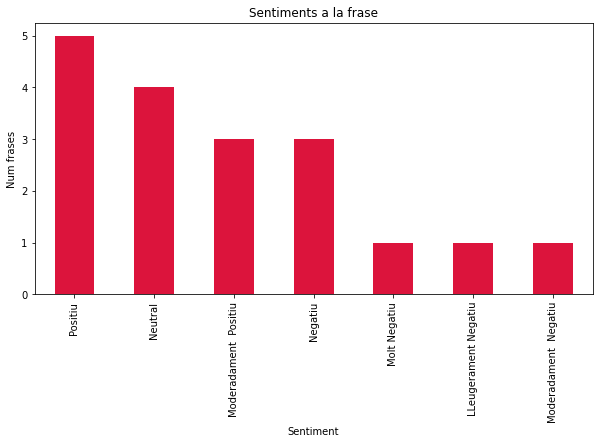

In [169]:
plt.figure(figsize=(10,5)) 
englishFilmreviewTokdf.SentimentTotal.value_counts().plot(kind='bar',color = 'crimson')
plt.xlabel('Sentiment')
plt.ylabel('Num frases')
plt.title('Sentiments a la frase')

*** Fem un mapa de paraules perque amb un cop d'ull podem tenir una represznetacio mes visual del gràfic anterior***
* Instalem a abnaconda el modul wordcloud
* importem les llibreries
* recomposem el text original netejat i en minuscules

In [170]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

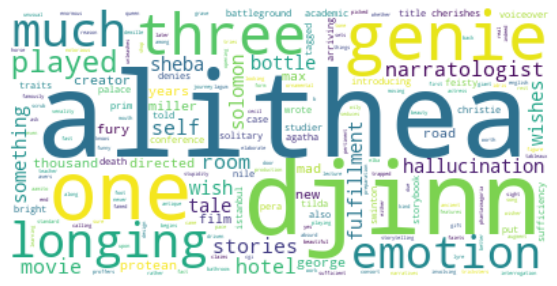

In [171]:
#Limpiamos el texto de letras extrañas
texteNet= ' '.join(englishFilmreviewTokdf['fraseClean'].str.lower())

wordcloud = WordCloud().generate(texteNet)
wordcloud = WordCloud(stopwords=stopWords, background_color="white", max_words=1500).generate(texteNet)
#wordcloud.most_common(20)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***Fem una gràfica de columnes amb les 15 paraules que mes surten al text, farem servir la llibreria collectiobns per iterar***

In [172]:
import collections

<BarContainer object of 15 artists>

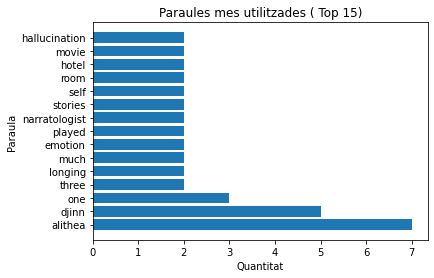

In [173]:
paraulesFiltrades = [word for word in texteNet.split() if word not in stopWords]
contadorParaules = collections.Counter(paraulesFiltrades)

paraules= []
comptador = []
for letter, count in contadorParaules.most_common(15):
    paraules.append(letter)
    comptador.append(count)
    

plt.title('Paraules mes utilitzades ( Top 15)')
plt.xlabel('Quantitat')
plt.ylabel('Paraula')
plt.barh(paraules, comptador)